# Popcorn

---

You're a force to be reckoned with. You are team "Popcorn". Working for a big movie studio, you need to report on metrics that will help: **A)** sell movie ideas to potential investors, and **B)** maximize product placement and / or sponsorships.

**Your studios lead data scientist has given you some direction / starting points:**
 - Which movies remained in the top 10 the longest?
 - Which movies were good investments?
 - Are there any interesting trends throughout the year?
 - Google anything interesting about flagship movies in terms of partnerships and how those deals could be relevant to consider in our own research.
 
**Bonus:**
 - Do any holidays impact sales performance or position?  How could we leverage this?
 - What could we look at outside our dataset that may help project good investments?


#### End with some kind of recommendation for new partnership engagements, tied to your opening goals / metrics.

How reliable can your reocmmendation(s) be?  Back up your assumptions with facts and data.

_[There's a data dictionary available!](http://www.amstat.org/publications/jse/v17n1/datasets.mclaren.html)_

Keep in mind the main points when presenting your findings!  It's interesting to share details and sidepoints, but make sure they're supporting and relating to pitching movies to investment, and helping maximize our partnership goals.


# Fang Hong

In [109]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline

# Increase default figure and font sizes for easier viewing.
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14

movies = pd.read_csv("/Users/fanghong/Dropbox/GA/eda-group_projects_1-lab/datasets/movie_weekend.csv")

movies.head(10)

#movies.tail(10)


,NUMBER,MOVIE,WEEK_NUM,WEEKEND_PER_THEATER,WEEKEND_DATE
0,1.0,A Beautiful Mind,1.0,701.0,12/21/01
1,1.0,A Beautiful Mind,2.0,14820.0,12/28/01
2,1.0,A Beautiful Mind,3.0,8940.0,1/4/02
3,1.0,A Beautiful Mind,4.0,6850.0,1/11/02
4,1.0,A Beautiful Mind,5.0,5280.0,1/18/02
5,1.0,A Beautiful Mind,6.0,5155.0,1/25/02
6,1.0,A Beautiful Mind,7.0,3735.0,2/1/02
7,1.0,A Beautiful Mind,8.0,2840.0,2/8/02
8,1.0,A Beautiful Mind,9.0,3890.0,2/15/02
9,1.0,A Beautiful Mind,10.0,2565.0,2/22/02


# Goal1: Which movies remained in the top 10 the longest?

In [199]:
# count the numbers of each movie and find out the top 10-\
top10=movies.MOVIE.value_counts().sort_values(ascending=False)
top10.head(10)

ET                         52
Raiders of the Lost Ark    43
Return of the Jedi         42
Forrest Gump               42
Titanic                    41
American Beauty            38
Chicago                    36
Gladiator                  33
Beverly Hills Cop          33
Shakespeare in Love        33
Name: MOVIE, dtype: int64

# Goal 2: Which movies were good investments?

In [111]:
1. # group by movie name and find out the values they earn
sorted_investment=movies.groupby('MOVIE').WEEKEND_PER_THEATER.sum().sort_values(ascending=False)
sorted_investment.head(15)

MOVIE
Star Wars                    228181.0
ET                           201257.0
Empire Strikes Back, The     178013.0
American Beauty              165891.0
Titanic                      165701.0
Return of the Jedi           163572.0
Million Dollar Baby          154115.0
Chicago                      146062.0
Raiders of the Lost Ark      144778.0
Forrest Gump                 128534.0
Home Alone                   128472.0
Shakespeare in Love          126779.0
Beverly Hills Cop            115915.0
Ghost Busters                113540.0
Star Wars: Phantom Menace    107684.0
Name: WEEKEND_PER_THEATER, dtype: float64

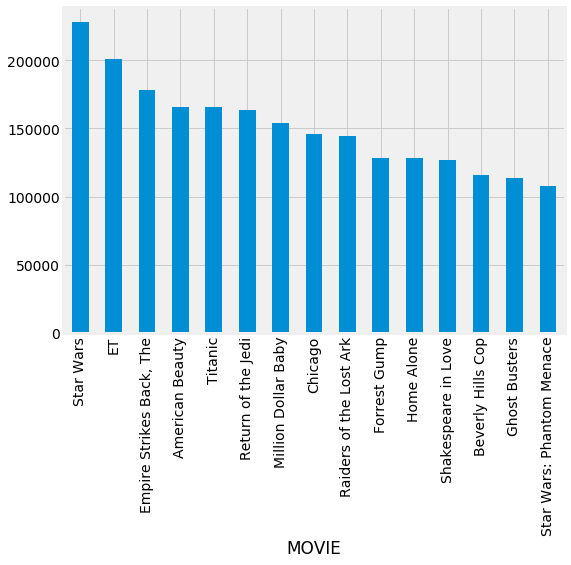

In [22]:
# bar graph of top 15 movies
sorted_investment.head(15).plot(kind='bar')

In [112]:
# 2. FIND OUT which movies have values that are above 75%? (top 25%)
# STEP 1: first calculate the cutpoint of 75%.
revenue=movies.groupby('MOVIE').WEEKEND_PER_THEATER.sum()
describe=revenue.describe()
describe

count        53.000000
mean      85998.094340
std       50383.408183
min         474.000000
25%       57568.000000
50%       73643.000000
75%      113540.000000
max      228181.000000
Name: WEEKEND_PER_THEATER, dtype: float64

In [113]:
# save the 75% value
revenue_75=describe[6]
revenue_75

113540.0

In [114]:
#  STEP 2: caculate the sum of each movies
movie_revenue=movies.groupby('MOVIE')['WEEKEND_PER_THEATER'].sum().reset_index()
movie_revenue.head()

,MOVIE,WEEKEND_PER_THEATER
0,A Beautiful Mind,74851.0
1,American Beauty,165891.0
2,Batman,72861.0
3,Beverly Hills Cop,115915.0
4,Chicago,146062.0


In [115]:
# Change the name to total_revenue
movie_revenue.rename(columns={'WEEKEND_PER_THEATER':'total_revenue'}, inplace=True)
movie_revenue.head()

,MOVIE,total_revenue
0,A Beautiful Mind,74851.0
1,American Beauty,165891.0
2,Batman,72861.0
3,Beverly Hills Cop,115915.0
4,Chicago,146062.0


In [116]:
# Step 3: find out movies whose total revenue are top 25%, meanwhile, reset index.
movie_revenue[movie_revenue.total_revenue>revenue_75].MOVIE.reset_index(drop=True)

0              American Beauty
1            Beverly Hills Cop
2                      Chicago
3                           ET
4     Empire Strikes Back, The
5                 Forrest Gump
6                   Home Alone
7          Million Dollar Baby
8      Raiders of the Lost Ark
9           Return of the Jedi
10         Shakespeare in Love
11                   Star Wars
12                     Titanic
Name: MOVIE, dtype: object

# Goal 3: Are there any interesting trends throughout the year?


In [ ]:
#1. We want to explore what are the revenue numbers throught the year?

In [106]:
# def month extractor, meanwhile, make sure the month value is a integer, not a a string value
# if month is a string, then it will not sort value correctly later in plot.
def month_extractor(date):
    date=str(date)
    month=date[0:date.find('/')]
    return int(month)

month_extractor("12/23/11")

12

In [117]:
# drop na value in the df
movies=movies.dropna()

In [118]:
# create new column with month with the month_extractor function
movies['MONTH']=movies['WEEKEND_DATE'].map(lambda x: month_extractor(x))
movies.head()

,NUMBER,MOVIE,WEEK_NUM,WEEKEND_PER_THEATER,WEEKEND_DATE,MONTH
0,1.0,A Beautiful Mind,1.0,701.0,12/21/01,12
1,1.0,A Beautiful Mind,2.0,14820.0,12/28/01,12
2,1.0,A Beautiful Mind,3.0,8940.0,1/4/02,1
3,1.0,A Beautiful Mind,4.0,6850.0,1/11/02,1
4,1.0,A Beautiful Mind,5.0,5280.0,1/18/02,1


In [119]:
# Calculate the total revenue for each month and sort them. 
# However, this will also give the table an extra column. If we do not want that column, just do sum.
month_revenue=movies.groupby('MONTH')['WEEKEND_PER_THEATER'].sum().reset_index()
month_revenue=month_revenue.sort_values('MONTH')
# rename the Weekend_per_theater
month_revenue.rename(columns={'WEEKEND_PER_THEATER':'month_revenue'}, inplace=True)
month_revenue.head()

,MONTH,month_revenue
0,1,405437.0
1,2,230463.0
2,3,233415.0
3,4,114724.0
4,5,561024.0


In [120]:
#convert month(object) to interger 
month_revenue['MONTH'] = month_revenue['MONTH'].astype('int')

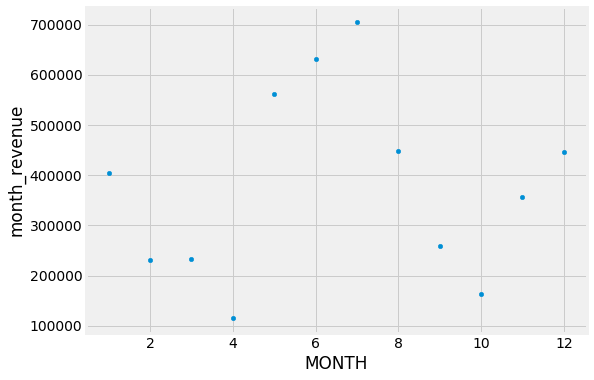

In [74]:
# create a scatter plot of month and total revenue of each month
month_revenue.plot(x='MONTH', y='month_revenue', kind='scatter')

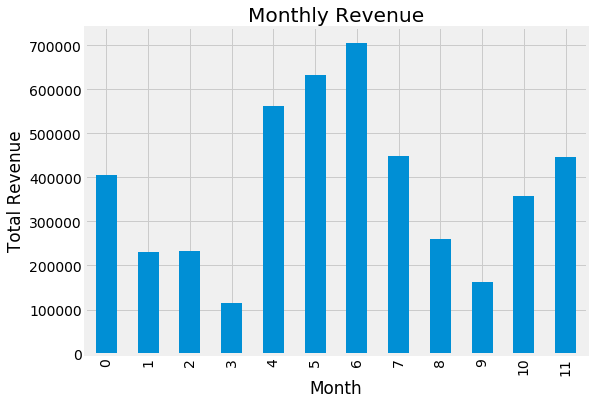

In [99]:
month_revenue.month_revenue.plot(kind='bar');
plt.xlabel('Month');
plt.ylabel('Total Revenue');
plt.title('Monthly Revenue');

# Goal 4: Hypothesis testing: 
# whether 75% of total revenue is earned within first 3 weeks.（Bad movies may only earn the money in the first 3 weeks!!! Reputation goes down!!!!)/
# Good movies, movies have high total revenue does not earn most money in the first three weeks.


In [153]:
# average number of weeks each movie display
movies.WEEK_NUM.describe()

count    1254.000000
mean       14.915470
std         9.996769
min         1.000000
25%         7.000000
50%        13.000000
75%        21.000000
max        52.000000
Name: WEEK_NUM, dtype: float64

In [265]:
# calcualte the total revenue of first 3 weeks. 
movies_week3=movies[movies.WEEK_NUM<4] # select the first three week num
# calculate the revenue of the first three weeks
movies_week3=movies_week3.groupby('MOVIE')['WEEKEND_PER_THEATER'].sum().reset_index()
movies_week3
# Change the name to week3_revenue
movies_week3.rename(columns={'WEEKEND_PER_THEATER':'week3_revenue'}, inplace=True)
movies_week3.head()

,MOVIE,week3_revenue
0,A Beautiful Mind,24461.0
1,American Beauty,79283.0
2,Batman,40871.0
3,Beverly Hills Cop,25272.0
4,Chicago,59000.0


In [143]:
# merge dataframe to have both total revenue and proportion of revenue make in the first three weeks. 
movie_proportion=movie_revenue.merge(movies_week3,on='MOVIE')

In [144]:
movie_proportion.head()

,MOVIE,total_revenue,week3_revenue
0,A Beautiful Mind,74851.0,24461.0
1,American Beauty,165891.0,79283.0
2,Batman,72861.0,40871.0
3,Beverly Hills Cop,115915.0,25272.0
4,Chicago,146062.0,59000.0


# interesting finding of pandas 1: could use variables in the dataframe to do calculation

In [266]:
# calculate the proportion of revenue earned in the first 3 weeks and sort descending
movie_proportion['proportion']=movie_proportion.week3_revenue/movie_proportion.total_revenue
movie_proportion=movie_proportion.sort_values('proportion', ascending=False)
movie_proportion.tail()

,MOVIE,total_revenue,week3_revenue,proportion
10,Ghost Busters,113540.0,29369.0,0.258667
3,Beverly Hills Cop,115915.0,25272.0,0.218022
46,Titanic,165701.0,36005.0,0.217289
7,ET,201257.0,33148.0,0.164705
31,Raiders of the Lost Ark,144778.0,21702.0,0.149898


In [161]:
movie_proportion.describe()

,total_revenue,week3_revenue,proportion
count,49.000000,49.000000,49.000000
mean,92970.061224,41017.510204,0.481095
std,45744.389490,17766.389451,0.169982
min,13853.000000,5304.000000,0.149898
25%,63638.000000,30010.000000,0.355652
50%,74851.000000,38182.000000,0.475166
75%,115915.000000,49708.000000,0.619845
max,228181.000000,102034.000000,0.794850


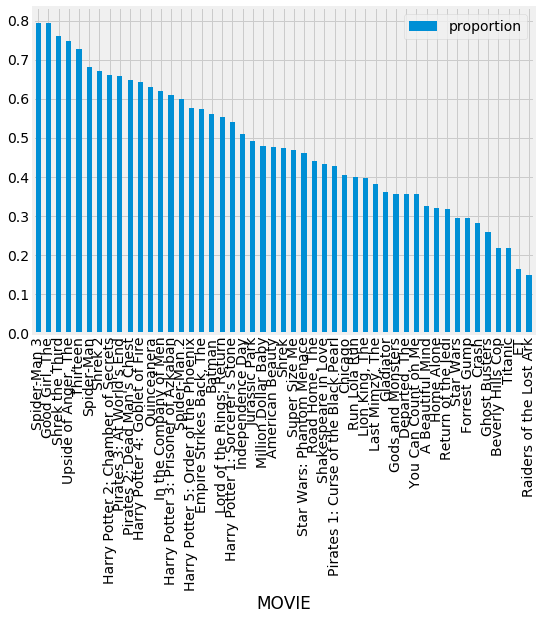

In [267]:
# plot 
movie_proportion.plot(x='MOVIE', y='proportion', kind='bar')


# interesing about pandas 2: can use the regression function and do the plot. Some statistic software might not be able to do this. 

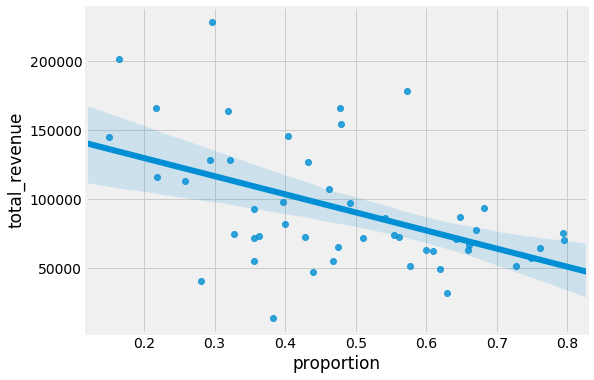

In [166]:
# relationship between total revenue and proportion of revenue earned within the first 3 weeks.
sns.regplot(movie_proportion['proportion'], movie_proportion['total_revenue'])

# Goal 5: Any relationship between week numbers and total revenue
(Any relationship between how you play & How much money you made?)

In [238]:
# calculate total wek
total_week=top10.reset_index()
total_week.head()
total_week=total_week.rename(columns={'index':'MOVIE', 'MOVIE':'total_week_num'})
total_week.head()

,MOVIE,total_week_num
0,ET,52
1,Raiders of the Lost Ark,43
2,Return of the Jedi,42
3,Forrest Gump,42
4,Titanic,41


In [232]:
# calculate total revenue
total_revenue=sorted_investment.reset_index()
total_revenue.head()

,MOVIE,WEEKEND_PER_THEATER
0,Star Wars,228181.0
1,ET,201257.0
2,"Empire Strikes Back, The",178013.0
3,American Beauty,165891.0
4,Titanic,165701.0


In [239]:
ave_revenue=total_week.merge(total_revenue,on='MOVIE')
ave_revenue.head(10)

,MOVIE,total_week_num,WEEKEND_PER_THEATER
0,ET,52,201257.0
1,Raiders of the Lost Ark,43,144778.0
2,Return of the Jedi,42,163572.0
3,Forrest Gump,42,128534.0
4,Titanic,41,165701.0
5,American Beauty,38,165891.0
6,Chicago,36,146062.0
7,Gladiator,33,73643.0
8,Beverly Hills Cop,33,115915.0
9,Shakespeare in Love,33,126779.0


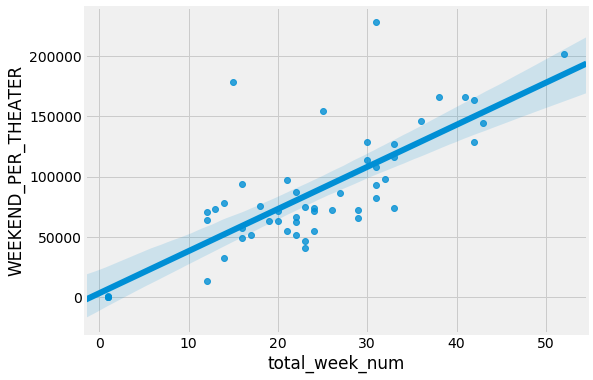

In [240]:
sns.regplot(ave_revenue['total_week_num'], ave_revenue['WEEKEND_PER_THEATER'])

# Goal 6: Whether there is a relationship between average week_revenue and total week number?(does play movie longer make higher weekly revenue)?


In [241]:
ave_revenue['week_revenue']=ave_revenue.WEEKEND_PER_THEATER/ave_revenue.total_week_num
ave_revenue=ave_revenue.sort_values('week_revenue', ascending=False)
ave_revenue.head()

,MOVIE,total_week_num,WEEKEND_PER_THEATER,week_revenue
42,"Empire Strikes Back, The",15,178013.0,11867.533333
13,Star Wars,31,228181.0,7360.677419
21,Million Dollar Baby,25,154115.0,6164.600000
41,Spider-Man,16,93854.0,5865.875000
46,Spider-Man 3,12,70368.0,5864.000000


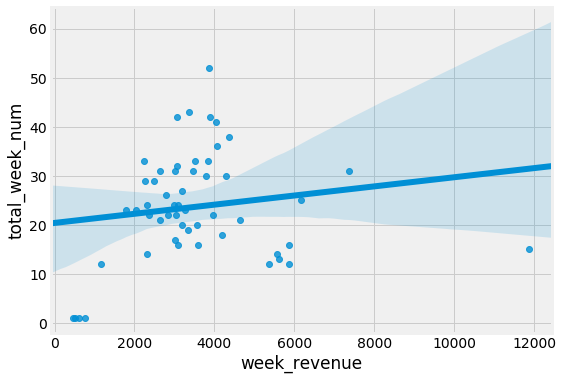

In [236]:
sns.regplot(ave_revenue['week_revenue'], ave_revenue['total_week_num'])

# relationship does not seem strong and clear. There are outliers.